## Imports:

In [69]:
from arcgis.gis import *
from IPython.display import display

## Conexion:

### AGOL

In [3]:
#gis = GIS(url="http://www.arcgis.com", username="renemorenow")
#gis = GIS(url="http://www.arcgis.com", username="williamrenem")
gis = GIS(url="http://www.arcgis.com", username="wmoreno_project_esri_co")

In [ ]:
gis = GIS(url='https://pythonapi.playground.esri.com/portal', username='arcgis_python', password='amazing_arcgis_123')

### SGC

In [70]:
gis = GIS(profile="sgc20_pruebas")
from sgc import sgccat20lib
sgccat20lib.gisConnection = gis

### ver conexion

In [72]:
print(gis.url, " ==> ", gis.users.me.username)

https://pruebascatastro.esri.co/portal  ==>  adminsgcv2


## ObtenerParametros SGC:

<Item title:"FS_Conservacion_Edicion_54001" type:Feature Layer Collection owner:adminsgcv2>
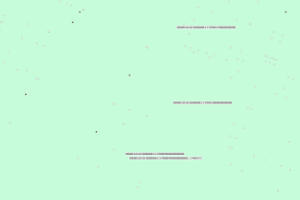

In [3]:
id_municipio = "54001"
dictParams = sgccat20lib.ObtenerParametros(id_municipio=id_municipio)
parcel_service = dictParams["PARCEL_SERVICE_NAME"]
ParcelService = gis.content.get(parcel_service)
ParcelService

# <h2 style="text-align:center;">Discover and Share</h2>

# gis module

## Gis Class:

### update_properties

In [ ]:
content_search = gis.content.search("owner:"+gis.users.me.username, item_type="Web Map", max_items=100)
content_search

<Item title:"Curso GIS" type:Web Map owner:renemorenow>
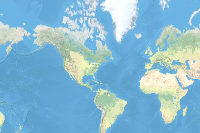

In [10]:
content_to_update = [f for f in content_search if f.title=="Curso GIS"][0]

In [ ]:
for key, value in gis.properties.items():
    print(key)

upd = {'geocodeService': [{
  "singleLineFieldName": "Single Line Input",
  "name": "AtlantaLocator",
  "url": "https://some.server.com/server/rest/services/GeoAnalytics/AtlantaLocator/GeocodeServer",
  "itemId": "abc6e1fc691542938917893c8944606d",
  "placeholder": "",
  "placefinding": "true",
  "batch": "true",
  "zoomScale": 10000}]}

gis.update_properties(upd)

### groups

In [18]:
v_GroupManager = gis.groups
print(type(v_GroupManager))
v_GroupManager

<class 'arcgis.gis.GroupManager'>


In [ ]:
list_groups2clone = []
v_GroupManager.clone(groups=list_groups2clone, skip_existing=True, offline=False, save_folder=None, file_name='GROUP_CLONER')

In [ ]:
v_GroupManager.create(title="v_GroupManager", tags="v_GroupManager,api", description=None, snippet=None, access='public', thumbnail=None, is_invitation_only=False, sort_field='avgRating', sort_order='desc', is_view_only=False, auto_join=False, provider_group_name=None, provider=None, max_file_size=None, users_update_items=False, display_settings=None, is_open_data=False, leaving_disallowed=False, hidden_members=False, membership_access=None, autojoin=False)

In [33]:
v_grupo = v_GroupManager.create(title="v_GroupManager", tags="v_GroupManager,api", description="Grupo de Prueba")
v_grupo

<Group title:"v_GroupManager" owner:renemorenow>

In [ ]:
v_GroupManager.search?

In [34]:
groups_search = v_GroupManager.search("v_GroupManager")
groups_search

[<Group title:"v_GroupManager" owner:renemorenow>]

In [27]:
v_grupo.get_members()

{'owner': 'renemorenow', 'admins': ['renemorenow'], 'users': []}

In [35]:
v_grupo.delete()

True

### content  => ContentManager

In [6]:
v_ContentManager = gis.content
v_ContentManager

In [ ]:
v_ContentManager.add(item_properties, data=None, thumbnail=None, metadata=None, owner=None, folder=None, item_id=None, **kwargs)

In [ ]:
v_ContentManager.advanced_search(query, return_count=False, max_items=100, bbox=None, categories=None, category_filter=None, start=1, sort_field='title', sort_order='asc', count_fields=None, count_size=None, as_dict=False, enrich=False)

In [8]:
v_ContentManager.advanced_search(query="FS_*", return_count=True)

16

In [ ]:
v_ContentManager.analyze(url=None, item=None, file_path=None, text=None, file_type=None, source_locale='en', geocoding_service=None, location_type=None, source_country='world', country_hint=None, enable_global_geocoding=None)

In [ ]:
v_ContentManager.bulk_update(itemids, properties)

In [ ]:
v_ContentManager.can_delete(item)

In [ ]:
v_ContentManager.can_reassign(items, user)

In [ ]:
v_ContentManager.categories

In [ ]:
v_ContentManager.check_url(url)

In [ ]:
v_ContentManager.clone_items(items, folder=None, item_extent=None, use_org_basemap=False, copy_data=True, copy_global_ids=False, search_existing_items=True, item_mapping=None, group_mapping=None, owner=None, preserve_item_id=False, **kwargs)
# Clona todo incluyendo capas y mapas de las cuales depende la app clonada

In [ ]:
v_ContentManager.cost(tile_storage=None, file_storage=None, feature_storage=None, generate_tile_count=None, loaded_tile_count=None, enrich_variable_count=None, enrich_report_count=None, service_area_count=None, geocode_count=None)

In [ ]:
v_ContentManager.create_empty_service(parameters, *, owner=None)

In [ ]:
v_ContentManager.create_folder(folder, owner=None)

In [ ]:
v_ContentManager.create_service(name, service_description='', has_static_data=False, max_record_count=1000, supported_query_formats='JSON', capabilities=None, description='', copyright_text='', wkid=102100, create_params=None, service_type='featureService', owner=None, folder=None, item_properties=None, is_view=False, tags=None, snippet=None, item_id=None)

In [ ]:
v_ContentManager.create_service?

In [ ]:
v_ContentManager.delete_folder(folder, owner=None)

In [ ]:
v_ContentManager.delete_items(items)

### api_keys

In [14]:
for key in gis.api_keys.keys:
    key

In [26]:
key.properties

{'itemId': 'd429fc3d01ed4367833962e2c76d7e66', 'client_id': '0ibd8gyrF9PQDHv1', 'client_secret': 'bc425d61f7df4c6c859eac9518cc011f', 'appType': 'apikey', 'redirect_uris': ['https://experience.arcgis.com/experience/2d5701056bd44b228756c3a54ecb71d3'], 'registered': 1650417614000, 'modified': 1687491846000, 'apnsProdCert': None, 'apnsSandboxCert': None, 'gcmApiKey': None, 'httpReferrers': [], 'privileges': ['premium:user:networkanalysis:servicearea', 'premium:user:geocode:temporary', 'premium:user:networkanalysis:routing', 'portal:apikey:basemaps'], 'isBeta': False, 'apiKey': 'AAPK2178568dd46c4171ae2ef42579959ee7fC6cjD5WCrBK5cLX1b2TpjGLBEXQna0hHyD6C7csFSJ4V3iuTxYXSSmEr75dJNse'}

### org_settings

In [28]:
gis.org_settings

{}

In [76]:
gis.properties

{
  "2DStylesGroupQuery": "title:\"Esri 2D Styles\" AND owner:esri_en",
  "EsriBoundaryLayersGroupQuery": "title:\"Esri Boundary Layers\" AND owner:esri_boundaries",
  "EsriDemographicLayersGroupQuery": "title:\"Esri Demographic Layers\" AND owner:esri_demographics",
  "access": "public",
  "allSSL": true,
  "analysisLayersGroupQuery": "",
  "availableCredits": 0,
  "basemapGalleryGroupQuery": "title:\"ArcGIS Online Basemaps\" AND owner:esri_en",
  "canListApps": true,
  "canListConsultingServices": true,
  "canListData": true,
  "canListPreProvisionedItems": true,
  "canListSolutions": true,
  "canProvisionDirectPurchase": true,
  "canSearchPublic": true,
  "canSetCustomBuyLink": true,
  "canSetQuestionnaire": true,
  "canSharePublic": true,
  "canSignInArcGIS": true,
  "canSignInIDP": true,
  "canSignInOIDC": true,
  "canSignInSocial": false,
  "colorSetsGroupQuery": "title:\"Esri Colors\" AND owner:esri_en",
  "commentsEnabled": false,
  "contentCategorySetsGroupQuery": "title:\"Arc

## ContentManager Class:
https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#contentmanager

In [29]:
v_ContentManager = ContentManager(gis)

In [32]:
item_properties = {
    "type": "Web Map",
    "title" : "Test ContentManager.add",
    "tags": "Hurricanes, Natural Disasters, USA",
    "description" : "Aggregated USA Hurricane Data for 2020",
    "commentsEnabled" : False}
v_ContentManager.add(item_properties)

<Item title:"Test ContentManager.add" type:Web Map owner:renemorenow>

In [40]:
# INCORRECTO:
v_ContentManager.search(query='owner:{}, type:map'.format(gis.users.me.username))
# Correcto:
v_ContentManager.search(query='type:map AND owner:{}'.format(gis.users.me.username))
v_ContentManager.search(query='type:map, owner:{}'.format(gis.users.me.username))

[<Item title:"ConterminousUSA_WebApp-crud" type:Web Mapping Application owner:renemorenow>,
 <Item title:"McCall impact assessment app" type:Web Mapping Application owner:renemorenow>,
 <Item title:"Inspección sin histórico" type:Web Map owner:renemorenow>,
 <Item title:"Sierra Nevada Alpine Climbing Routes" type:Web Map owner:renemorenow>,
 <Item title:"Curso GIS" type:Web Map owner:renemorenow>,
 <Item title:"Parks and Open Space" type:Web Map owner:renemorenow>,
 <Item title:"ConterminousUSAWebApp" type:Web Mapping Application owner:renemorenow>,
 <Item title:"TraficoEnVivo_Colombia" type:Web Mapping Application owner:renemorenow>,
 <Item title:"McCall impact assessment" type:Web Map owner:renemorenow>,
 <Item title:"Mount Rainier Lahar Zones" type:Web Mapping Application owner:renemorenow>]

## GroupManager Class:
https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#groupmanager

In [41]:
v_GroupManager = GroupManager(gis)

In [43]:
group = v_GroupManager.create(title="New Group", tags="new, group, USA", description="a new group in the USA", access="public")

In [44]:
group

<Group title:"New Group" owner:renemorenow>

In [48]:
v_GroupManager.clone(groups=[group])

AttributeError: 'GroupManager' object has no attribute 'clone'

In [ ]:
v_GroupManager.create_from_dict(dict)

In [49]:
groupid = group.id
v_GroupManager.get(groupid)

<Group title:"New Group" owner:renemorenow>

## UserManager Class:
https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#usermanager

In [52]:
v_UserManager = UserManager(gis)
type(gis.users) == type(v_UserManager)

True

In [58]:
v_UserManager.counts(type='user_type', as_df=True)

key  count
0  creatorUT      1

In [62]:
users = v_UserManager.search("*")
v_UserManager.user_groups(users)

[{'username': 'renemorenow',
  'total': 1,
  'groups': [{'id': '6e876e914b8147eb8c06f30cd195b398',
    'title': 'New Group'}]}]

## Item Class:
https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#item

In [73]:
itemId = "be09e71587bf4024ab96ad48cf9c2f53" # Servicio de consulta
v_item = Item(gis, "e3c17d50aa9641b189da34fff0ea00bc")

In [64]:
v_item.can_delete

True

In [65]:
v_item.protect()

{'success': True}

In [66]:
v_item.can_delete

{'code': 400, 'messageCode': 'CONT_0048', 'message': 'Unable to delete item e3c17d50aa9641b189da34fff0ea00bc. Delete protection is turned on.', 'offendingItems': []}


False

In [69]:
v_item.download(r"D:\EsriTraining\APIforPython\TemasExamen\jescudero")

'D:\\EsriTraining\\APIforPython\\TemasExamen\\jescudero\\Curso GIS'

In [72]:
# Items dependientes de este item:
print("Objetos dependientes de este item:", v_item.dependent_to())
# Items de los cuales este item depende:
print("Items de los cuales este item depende:", v_item.dependent_upon()

{'total': 0, 'start': 1, 'num': 0, 'nextStart': -1, 'list': []}

item.title: Workforce Dashboard Map_54001 type: Web Map
Items dependientes de este item: {'total': 0, 'start': 1, 'num': 0, 'nextStart': -1, 'list': []}
Items de los cuales este item depende: {'total': 4, 'start': 1, 'num': 4, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': '67756852df2347a0a11175d73be957c6'}, {'dependencyType': 'id', 'id': '665d218478f24261b6c627860e31c479'}, {'dependencyType': 'id', 'id': '1a04c9e4fe184cf38ddbf2097a6411be'}, {'dependencyType': 'url', 'url': 'https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer'}]}


<Item title:"V_Assignments_Dispatchers_54001" type:Feature Layer Collection owner:adminsgcv2>
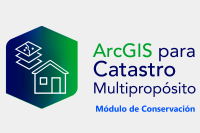

<Item title:"V_Assignments_Workers_54001" type:Feature Layer Collection owner:adminsgcv2>
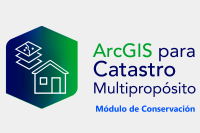

<Item title:"Trabajo de Campo Conservacion_54001" type:Feature Layer Collection owner:adminsgcv2>
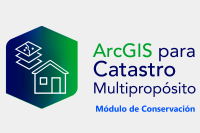

In [23]:
#item = ParcelService
item = gis.content.get("fca1d8f673784106bfc2ba7694423c22")
print("item.title:",item.title, "type:",item.type)
print("Items dependientes de este item:", item.dependent_to())
if item.dependent_to()["total"]>0:
    for dep in item.dependent_to()["list"]:
        if dep["dependencyType"] == "id":
            item_dep = gis.content.get(dep["id"])
            display(item_dep)
print("Items de los cuales este item depende:", item.dependent_upon())
if item.dependent_upon()["total"]>0:
    for dep in item.dependent_upon()["list"]:
        if dep["dependencyType"] == "id":
            item_dep = gis.content.get(dep["id"])
            display(item_dep)

## Admin:

In [78]:
gis_servers = gis.admin.servers.list()
gis_servers

[< Server @ https://pruebascatastro.esri.co/server/admin >]

In [91]:
server1 = gis_servers[0]
server1.services.list()

[]

In [108]:
gis.admin.server

AttributeError: 'PortalAdminManager' object has no attribute 'server'

In [81]:
server1.services.folders

['GEOPROCESOS', 'Hosted', 'SERVICIOS', 'System', 'Utilities', 'WMX', '/']

In [50]:
hosted_services = server1.services.list(folder='GEOPROCESOS')
#print the top 5 as a sample
hosted_services

[<Service at https://pruebascatastro.esri.co/server/admin/services/GEOPROCESOS/actualizadominios.GPServer>,
 <Service at https://pruebascatastro.esri.co/server/admin/services/GEOPROCESOS/calcularavaluos.GPServer>,
 <Service at https://pruebascatastro.esri.co/server/admin/services/GEOPROCESOS/cargalaboral.GPServer>,
 <Service at https://pruebascatastro.esri.co/server/admin/services/GEOPROCESOS/compararavaluos.GPServer>,
 <Service at https://pruebascatastro.esri.co/server/admin/services/GEOPROCESOS/cppc.GPServer>,
 <Service at https://pruebascatastro.esri.co/server/admin/services/GEOPROCESOS/eliminarVersiones.GPServer>,
 <Service at https://pruebascatastro.esri.co/server/admin/services/GEOPROCESOS/enviarCorreoActualizacion.GPServer>,
 <Service at https://pruebascatastro.esri.co/server/admin/services/GEOPROCESOS/generarcintas.GPServer>,
 <Service at https://pruebascatastro.esri.co/server/admin/services/GEOPROCESOS/generarr1r2.GPServer>,
 <Service at https://pruebascatastro.esri.co/server/

In [46]:
service1 = hosted_services[9]
service1

<Service at https://pruebascatastro.esri.co/server/admin/services/GEOPROCESOS/Pruebas.GPServer>

In [47]:
service1.status

{'configuredState': 'STARTED', 'realTimeState': 'STARTED'}

In [49]:
#start the service and confirm
service1.stop()
service1.status

{'configuredState': 'STOPPED', 'realTimeState': 'STOPPED'}

In [51]:
server1.logs.settings

{'logDir': 'C:\\arcgisserver\\logs\\',
 'logLevel': 'DEBUG',
 'maxErrorReportsCount': 10,
 'maxLogFileAge': 9,
 'usageMeteringEnabled': False,
 'statisticsConfig': {'enabled': True,
  'samplingInterval': 30,
  'maxHistory': 0,
  'statisticsDir': 'C:\\arcgisserver\\directories\\arcgissystem'}}

In [52]:
import datetime
import pandas as pd
now = datetime.datetime.now()
start_time = now - datetime.timedelta(days=1)
start_time

datetime.datetime(2023, 11, 27, 9, 3, 49, 748582)

In [53]:
recent_logs = server1.logs.query(start_time = start_time)

#print a message as a sample
recent_logs['logMessages'][0]

{'type': 'WARNING',
 'message': 'JTXTokenManager:Parse Token Parser item i = 6, ipTokenParser = <NonNULL>',
 'time': 1701091777265,
 'source': 'WMX/WorkflowManagerService_54001.WMServer',
 'machine': 'PRUEBASCATASTRO.ESRI.CO',
 'user': 'adminsgcv2',
 'code': 1000,
 'elapsed': '',
 'process': '17436',
 'thread': '21288',
 'methodName': '',
 'requestID': '5cfcbf9c-ee4c-4dfb-8432-92c619ba52b6'}

In [54]:
log_df = pd.DataFrame.from_records(recent_logs)
log_df.head(5) #display the first 5 records

endTime  hasMore                                        logMessages  \
0  1700773909327     True  {'type': 'WARNING', 'message': 'JTXTokenManage...   
1  1700773909327     True  {'type': 'WARNING', 'message': 'JTXTokenManage...   
2  1700773909327     True  {'type': 'WARNING', 'message': 'JTXTokenManage...   
3  1700773909327     True  {'type': 'WARNING', 'message': 'JTXTokenManage...   
4  1700773909327     True  {'type': 'WARNING', 'message': 'JTXTokenManage...   

       startTime  
0  1701091777265  
1  1701091777265  
2  1701091777265  
3  1701091777265  
4  1701091777265

### Querying maximum reponse times for the last 7 days

In [56]:
usage_reports = server1.usage.list()
usage_reports
for r in usage_reports:
    print(r.properties['reportname'])

max_resp_report = usage_reports[0]

#Run the query
data = max_resp_report.query()

#display the keys in the report query response
data['report'].keys()

Max response times for the last 7 days
Timed-out requests for the last 7 days
Total requests for the last 7 days


dict_keys(['reportname', 'metadata', 'time-slices', 'report-data'])

In [57]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

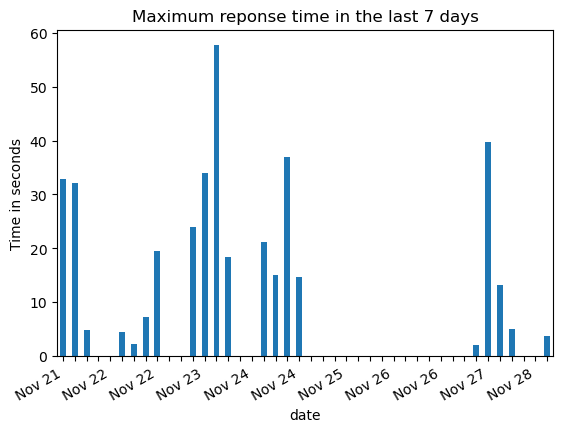

In [58]:
#store reponse times in Y axis
data_y = data['report']['report-data'][0][0]['data']

#convert dates to readable dates and store in X axis
data_x = [pd.to_datetime(datetime.fromtimestamp(d//1000)) \
          for d in data['report']['time-slices']]

df = pd.DataFrame(list(zip(data_x, data_y)), columns=["date", "count"])
q = df['count'].isnull() # change NaN values to 0
df.loc[q, 'count'] = 0
df.index = df['date']
df['count'] = df['count'] 

ax = df['count'].plot(kind='bar', x=df['date'])
ticklabels = ['']*len(df.index)
ticklabels[::4] = [item.strftime('%b %d') for item in df.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax.set_title('Maximum reponse time in the last 7 days')
ax.set_ylabel('Time in seconds')
plt.gcf().autofmt_xdate()
plt.show()

In [65]:
server1.system.licenses.keys()

dict_keys(['edition', 'level', 'datafeature', 'extensions', 'features'])

In [66]:
server1.system.licenses['edition']

{'name': 'svradvanced',
 'version': '10.9',
 'canExpire': True,
 'expiration': 1722402000000,
 'featureName': 'esriServerLicenseAdvanced'}

In [67]:
from datetime import datetime

for extn in server1.system.licenses['features']:
    #convert expiration to a readable format
    d = datetime.fromtimestamp(int(extn['expiration']/1000))
    
    print("{:50s} {}".format(extn['displayName'], d.isoformat()))

ArcGIS GIS Server Advanced                         2024-07-31T00:00:00
Enterprise Geodatabase Support                     2024-07-31T00:00:00
ArcGIS Workflow Manager                            2024-07-31T00:00:00
ArcGIS Server Enterprise                           2024-07-31T00:00:00
ArcGIS Network Analyst                             2024-07-31T00:00:00


## Clonning Process:
https://developers.arcgis.com/python/samples/clone-portal-users-groups-and-content-rn/

<Item title:"Mount Rainier Lahar Zones" type:Web Map owner:renemorenow>
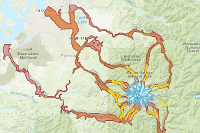

In [74]:
v_item = Item(gis, "a1e32481b9f8495484b728565c4133ca")
v_item

In [75]:
v_ContentManager.clone_items([v_item])

[<Item title:"LaharParcels" type:Feature Layer Collection owner:renemorenow>,
 <Item title:"Pyroclastic" type:Feature Layer Collection owner:renemorenow>,
 <Item title:"LaharCase1" type:Feature Layer Collection owner:renemorenow>,
 <Item title:"LaharCase2" type:Feature Layer Collection owner:renemorenow>,
 <Item title:"LaharCase3" type:Feature Layer Collection owner:renemorenow>,
 <Item title:"Glaciers100K" type:Feature Layer Collection owner:renemorenow>,
 <Item title:"Mount Rainier Lahar Zones" type:Web Map owner:renemorenow>]

## Common Parameters:
https://developers.arcgis.com/rest/users-groups-and-items/common-parameters.htm

### Parameters common to all operations

#### token, f, callback

#### <b>Item parameters</b>: title, thumbnail, thumbnailurl, metadata, metadataEditable, metadataFormats, type, typeKeywords, description, tags, snippet, extent, spatialReference, accessInformation, licenseInfo, culture, properties, appCategories, industries, languages, largeThumbnail, banner, screenshot, listingProperties, serviceUsername, servicePassword, serviceProxyFilter, categories.

#### <b>Group parameters</b>: title, description, typeKeywords, snippet, tags, phone, access (private | org | public), sortField (title | owner | avgrating | numviews | created | modified), sortOrder (asc | desc), isViewOnly (false | true), isInvitationOnly  (false | true), thumbnail, capabilities (updateItemControl | distributed), leavingDisallowed (false | true), hiddenMembers (false | true), membershipAccess (org | collaboration | none), autoJoin (false | true)

#### <b>User parameters: access (private | org | public), preferredView (Web | GIS | null), description, tags, thumbnail, password, fullname, email, securityQuestionIdx, securityAnswer, securityAnswer, cultureFormat, region, idpUsername, 

#### <b>Portal parameters</b>: name, access, description, canSharePublic (true | false), canSearchPublic (true | false), thumbnail, urlKey, urlHostname, culture, cultureFormat, featuredItemsGroupQuery, region, portalProperties, units, homePageFeaturedContentCount, homePageFeaturedContent, basemapGalleryGroupQuery, devbasemapGalleryGroupQuery, templatesGroupQuery, layerTemplatesGroupQuery, symbolSetsGroupQuery, colorSetsGroupQuery, analysisLayersGroupQuery, featuredGroups, defaultBasemap, defaultExtent, rotatorPanels, showHomePageDescription, backgroundImage, geocodeService, routeServiceLayer, geometryService, elevation3DService, printServiceTask, closestFacilityService, asyncClosestFacilityService, serviceAreaService, asyncServiceAreaService, odCostMatrixService, asyncODCostMatrixService, syncVRPService, asyncVRPService, geoenrichmentService, analysisService, routingServicesSource, trafficService, trafficDataService, asyncRouteService, asyncLocationAllocationService, routingUtilitiesService, elevationService, elevationSyncService, hydrologyService, asyncGeocode, orthomappingElevationService, rasterUtilitiesService, bingKey, canShareBingPublic, authorizedCrossOriginDomains, allowedOrigins, allowedRedirectUris, allSSL (true | false), useStandardizedQuery (true | false), canSigninArcGIS (true | false), canSigninIDP (true | false), commentsEnabled (true | false), maxTokenExpirationMinutes, mfaEnabled, mfaAdmins, metadataEditable (true | false), creditAssignments (enabled | disabled), defaultUserCreditAssignment, updateUserProfileDisabled, useVectorBasemaps, metadataFormats, clearEmptyFields, contacts

#### <b>Paging parameters</b>: total, start, num, nextStart

#### <b>Listing properties</b>:
{
  "licenseType": "<free | ela | consumption | preprovisioned>",
  "listingAccess": "<private | public>",
  "priceDesc": "<priceDesc>",
  "creditsPerTransaction": <creditsPerTransaction>,
  "trialSupported": <true | false>,
  "trialDuration": <trialDuration>,
  "ecommerceEnabled": <true | false>,
  "licenseBy": <licenseByOrg | licenseByUser>
}

#### <b>Provision properties</b>:
{
  "itemId": "<itemId>",
  "orgId": "<vendorOrgId>",
  "purchaserOrgId": "<purchaserOrgId>",
  "purchaserUsername": "<purchaserUsername>",
  "purchaserFullName": <purchaserFullName>,
  "purchaserEmail": <purchaserEmail>,
  "purchaserPhone": <purchaserPhone>,
  "startDate": <provisionStartDate>,
  "endDate": <provisionEndDate>, // -1 indicates an unexpiring provision
  "purchased": <true | false>,
  "trial": <true | false>,
  "interested": <true | false>,
  "created": <createdDate>,
  "modified": <modifiedDate>,
  "orgEntitlements": {
    "maxUsers": <maximum number of users>,
    "entitlementsModified": <epoch timestamp when org entitlements were last modified>,
    "entitlements": {
        "<entitlement string>": {"num": <number of users>} //entitlement string uniquely identifies entitlement, listing itemId is used typically 
    }
  }
}

#### <b>Purchaser parameters</b>:

#### <b>Allowable HTML tags</b>:

#### <b>Date format</b>:

### Web content

#### Maps

#### Layers

#### Tools

#### Applications

#### Data files

### Desktop content

#### Maps

#### Layers

#### Styles

#### Tools

#### Applications